In [1]:
from haloflow.npe import plotting as P
from haloflow import config as C

In [2]:
dat_dir = C.get_dat_dir()
data_dir = dat_dir + 'hf2/npe/'

In [3]:
npe_train_sim = 'Simba100'
test_sim = 'Eagle100'
obs = 'mags_morph_extra'

In [4]:
all_sims = ['TNG_ALL', 'Eagle100', 'Simba100']

917 models trained
[820, 330, 469, 747, 737]
259 models trained
[230, 45, 40, 16, 97]
29 models trained
[2, 19, 25, 21, 6]


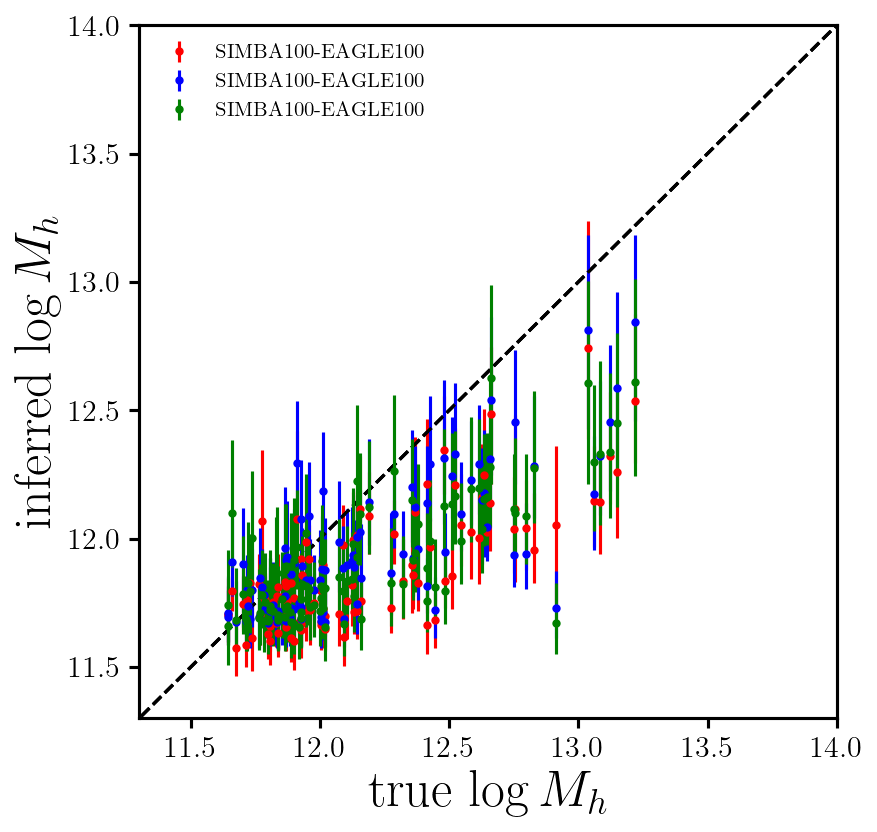

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150)

ax, y_true, y_pred = P.plot_true_pred(
    ax,
    train_obs=obs,
    dann_sim=test_sim,
    npe_train_sim=npe_train_sim,
    test_obs=obs,
    test_sim=test_sim,
    device='cpu',
    mass='halo',
    data_dir=data_dir,
    with_dann=False,
    fmt='.r',
)

try:
    ax, y_true, y_pred = P.plot_true_pred(
        ax,
        train_obs=obs,
        dann_sim=test_sim,
        npe_train_sim=npe_train_sim,
        test_obs=obs,
        test_sim=test_sim,
        device='cpu',
        mass='halo',
        data_dir=data_dir,
        with_dann=True,
        fmt='.b',
    )
except Exception as e:
    print(f"Error plotting DANN results: {e}")
    print("Continuing without DANN results.")

try:
    ax, y_true, y_pred = P.plot_true_pred(
        ax,
        train_obs=obs,
        dann_sim=test_sim,
        npe_train_sim=npe_train_sim,
        test_obs=obs,
        test_sim=test_sim,
        device='cpu',
        mass='halo',
        data_dir=data_dir,
        with_mmd=True,
        fmt='.g',
    )
except Exception as e:
    print(f"Error plotting MMD results: {e}")
    print("Continuing without MMD results.")

ax.legend()

y_nde_q0, y_nde_q1, y_nde_q2 = np.quantile(y_pred, (0.16, 0.5, 0.84), axis=1)



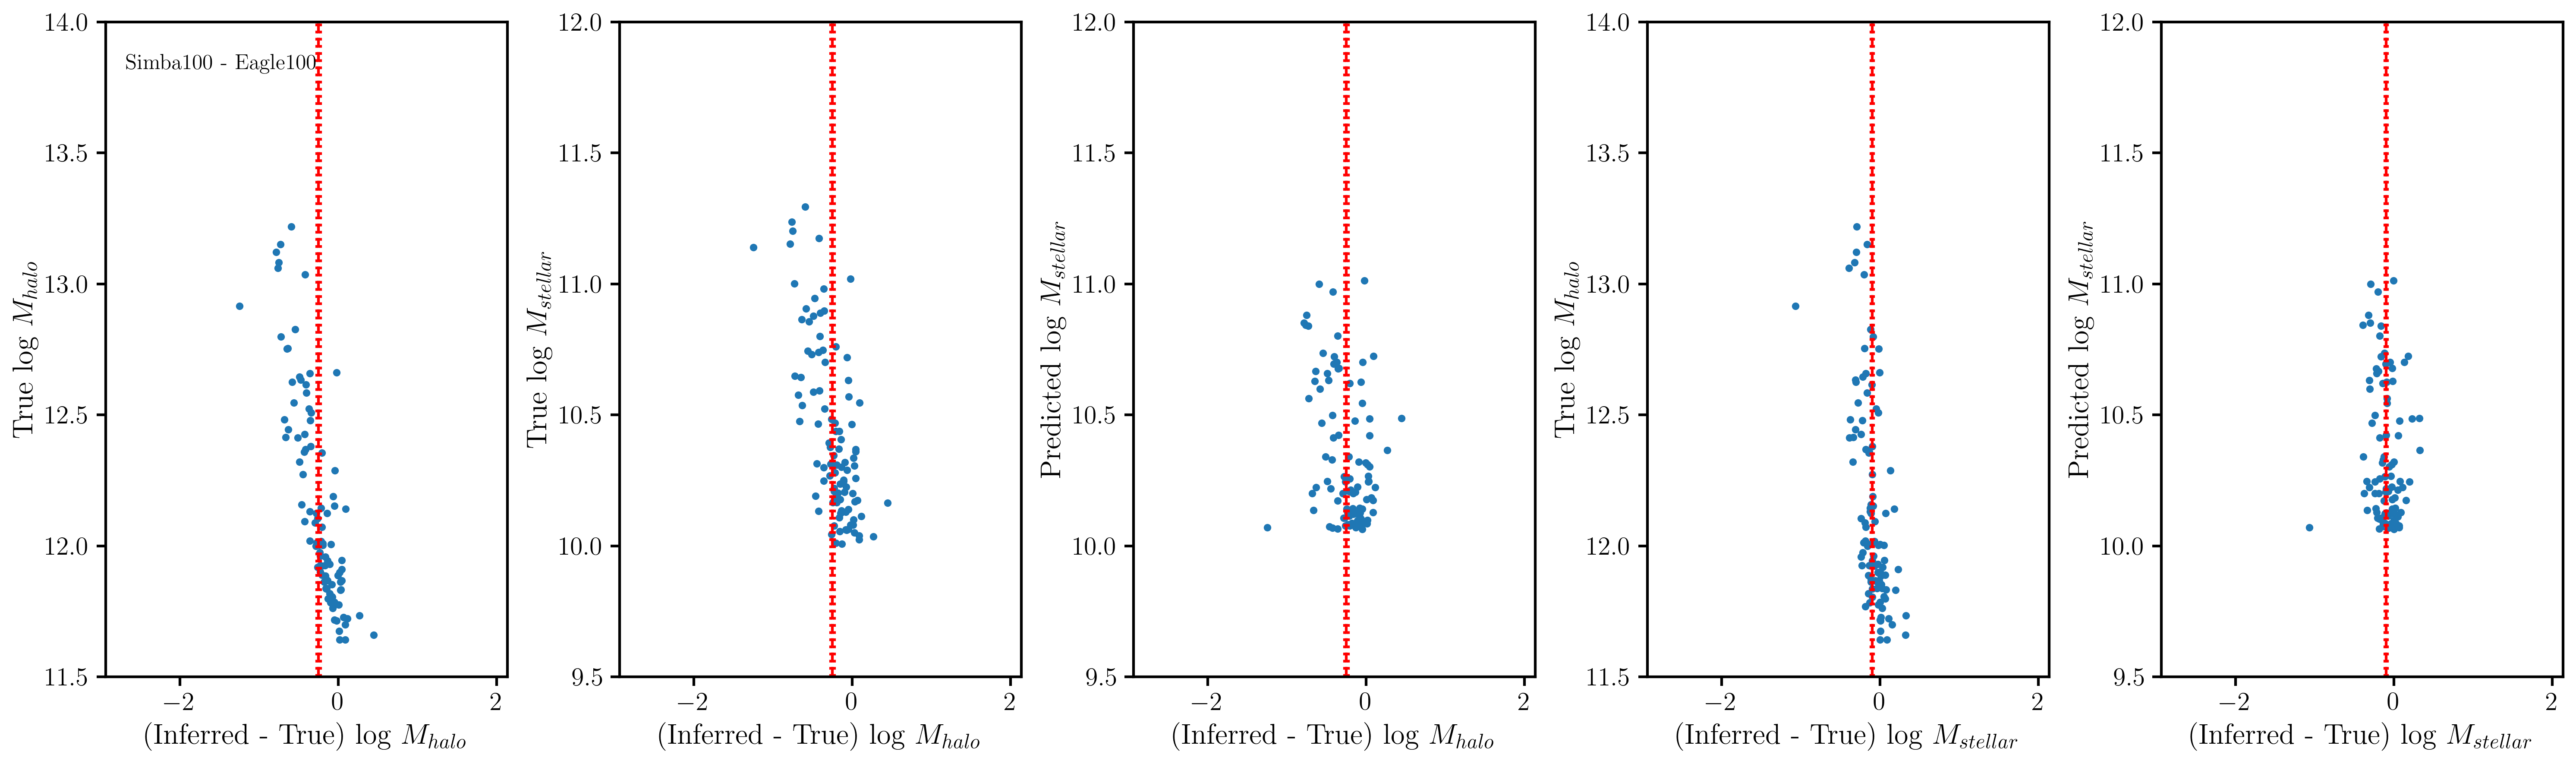

In [6]:
plt.rcParams['axes.labelsize'] = 16

# (Pred - True) Halo mass vs True Halo mass
fig, ax = plt.subplots(1, 5, figsize=(20, 6), dpi=300, sharex=True)

p_t_halo = y_nde_q1[:, 1] - y_true[:, 1]
p_t_stellar = y_nde_q1[:, 0] - y_true[:, 0]
t_halo = y_true[:, 1]

ax[0].scatter(p_t_halo, t_halo, s=10)
ax[0].set_ylabel('True log $M_{halo}$', fontsize=16)
ax[0].set_xlabel('(Inferred - True) log $M_{halo}$', fontsize=16)

ax[0].set_ylim(11.5, 14)

# (Pred - True) Halo mass vs True Stellar mass
t_stellar = y_true[:, 0]

ax[1].scatter(p_t_halo, t_stellar, s=10)
ax[1].set_ylabel('True log $M_{stellar}$', fontsize=16)
ax[1].set_xlabel('(Inferred - True) log $M_{halo}$', fontsize=16)

ax[1].set_ylim(9.5, 12)


# (Pred - True) Halo mass vs Pred Stellar mass
p_stellar = y_nde_q1[:, 0]
ax[2].scatter(p_t_halo, p_stellar, s=10)
ax[2].set_ylabel('Predicted log $M_{stellar}$', fontsize=16)
ax[2].set_xlabel('(Inferred - True) log $M_{halo}$', fontsize=16)

ax[2].set_ylim(9.5, 12)

# (Pred - True) Stellar Mass vs True Halo Mass
ax[3].scatter(p_t_stellar, t_halo, s=10)
ax[3].set_ylabel('True log $M_{halo}$', fontsize=16)
ax[3].set_xlabel('(Inferred - True) log $M_{stellar}$', fontsize=16)
ax[3].set_ylim(11.5, 14)

# (Pred - True) Stellar Mass vs Predicted Stellar Mass
ax[4].scatter(p_t_stellar, p_stellar, s=10)
ax[4].set_ylabel('Predicted log $M_{stellar}$', fontsize=16)
ax[4].set_xlabel('(Inferred - True) log $M_{stellar}$', fontsize=16)
ax[4].set_ylim(9.5, 12)


# average offset and standard error in offsets plotted as a horizontal dotted line. 
mean_offset = np.mean(p_t_halo)
std_offset = np.std(p_t_halo) / np.sqrt(len(p_t_halo))
ax[0].axvline(mean_offset, color='red', linestyle='--', label='Mean Offset')
ax[0].axvline(mean_offset + std_offset, color='red', linestyle=':', label='Mean Offset ± SE')
ax[0].axvline(mean_offset - std_offset, color='red', linestyle=':')

ax[1].axvline(mean_offset, color='red', linestyle='--', label='Mean Offset')
ax[1].axvline(mean_offset + std_offset, color='red', linestyle=':', label='Mean Offset ± SE')
ax[1].axvline(mean_offset - std_offset, color='red', linestyle=':')

ax[2].axvline(mean_offset, color='red', linestyle='--', label='Mean Offset')
ax[2].axvline(mean_offset + std_offset, color='red', linestyle=':', label='Mean Offset ± SE')
ax[2].axvline(mean_offset - std_offset, color='red', linestyle=':')

mean_offset_stellar = np.mean(p_t_stellar)
std_offset_stellar = np.std(p_t_stellar) / np.sqrt(len(p_t_stellar))
ax[3].axvline(mean_offset_stellar, color='red', linestyle='--', label='Mean Offset')
ax[3].axvline(mean_offset_stellar + std_offset_stellar, color='red', linestyle=':', label='Mean Offset ± SE')
ax[3].axvline(mean_offset_stellar - std_offset_stellar, color='red', linestyle=':')
ax[4].axvline(mean_offset_stellar, color='red', linestyle='--', label='Mean Offset')
ax[4].axvline(mean_offset_stellar + std_offset_stellar, color='red', linestyle=':', label='Mean Offset ± SE')
ax[4].axvline(mean_offset_stellar - std_offset_stellar, color='red', linestyle=':')

# Text annotations 
ax[0].text(0.05, 0.95, f'{npe_train_sim} - {test_sim}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()